## Deluppgift 1
Ev. kommentar:

In [1]:
import csv

def read_file(csv_filename):
    """Läs innehållet i en CSV-filen och returnera den som en lista."""
    with open(csv_filename, mode="r", encoding="UTF-8") as csv_data: # Läser CSV-filen
        reader = csv.reader(csv_data, delimiter=";")                 # Gör varje rad i CSV-filen till en lista, och lämna tillbaka det
        return list(reader)                                          # Skapar en lista med innehållet av flera listor

# Läs data från CSV-filerna och lagra dem
kpiData       = read_file("kpi-1.csv")
tjansteData   = read_file("tjänster-1.csv")
livsmedelData = read_file("livsmedel-1.csv")

# Skriv ut de två första raderna av varje fil
print("\033[1mkpiData:\033[0m")         # Bold text
print(kpiData[:2])
print("\n\033[1mtjansteData:\033[0m")   # Ny rad och sen bold text
print(tjansteData[:2])
print("\n\033[1mlivsmedelData:\033[0m") # Ny rad och sen bold text
print(livsmedelData[:2])


kpiData:
[['År', 'Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'], ['2022', '350.56', '353.56', '359.8', '362.02', '365.82', '370.95', '371.28']]

tjansteData:
[['', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], ['livsmedel och alkoholfria drycker', '100', '115.02', '129.31', '144.39', '161.22', '173.19', '185.62', '191.35', '201.84', '213.43', '228.8', '239.18', '226.88', '228.48', '232.43', '235.75', '219.36', '220.19', '222.69', '225.97', '225.98', '232.47', '240.02', '240.79', '239.74', '238.09', '239.91', '244.77', '261.69', '269.25', '273.15', '276.65', '280.76', '286.96', '288.02', '294.73', '297.84', '304.22', '311.45', '320.19', '327.02', '328.36']]

livsme

## Deluppgift 2
Ev. kommentar:

Ange vilken månad som ska presenteras: 10


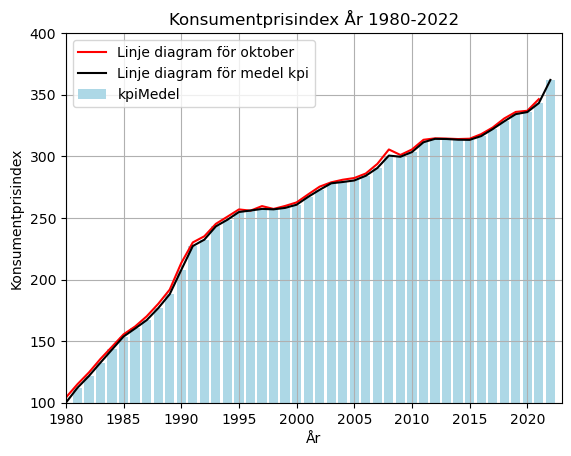

43
42
43


In [4]:
import matplotlib.pyplot as plt

def calc_mean(all_år, få_månad):
    """Skapa data från list i parametrar för grafer och ett stapeldiagram."""
    data_alla_år, lista_medelvärde, månad_värde_för_alla_år = [], [], []
    # Beräkna all åren data för grafen
    for år in reversed(all_år[1:]):
        data_alla_år.append(int(år[0])) # lägg till året
        # Samla Ihop hela årets gemensam summa, använd inte första index eftersom det är året som data är för
        summa = 0
        for månad in år[1:]:
            summa += float(månad)
        summa /= len(år) - 1 # Beräkna medelvärde
        # Lägg till medelvärdet
        lista_medelvärde.append(summa)
        if år[0] == "2022" and få_månad > 7: # Undvik att lägg till om index är över 7 för år 2022
            continue
        månad_värde_för_alla_år.append(float(år[få_månad]))

    # Skapa grafer och ett stapeldiagram
    if len(månad_värde_för_alla_år) != len(data_alla_år):                 # Hantera fel om inte samma längd.
        plt.plot(data_alla_år[:-1], månad_värde_för_alla_år, color="red")
    else:
        plt.plot(data_alla_år, månad_värde_för_alla_år, color="red")
    plt.plot(data_alla_år, lista_medelvärde, color="black")
    plt.bar(data_alla_år,  lista_medelvärde, color="#ADD8E6")

    # Lägg till info
    str = "Linje diagram för " \
    + ["","januari", "februari", "mars", "april", "maj", "juni", "juli", "augusti", "september", "oktober", "november", "december"][få_månad]
    plt.legend((str, "Linje diagram för medel kpi", "kpiMedel"), loc="upper left")

    plt.title("Konsumentprisindex År 1980-2022")
    plt.xlabel("År")     # X-axel och y-axel namn
    plt.ylabel("Konsumentprisindex")
    plt.xlim(1980, 2023) # Max och min värde på x-axel och y-axel.
    plt.ylim(100, 400)
    plt.grid(True)
    plt.show()
    
    print(len(data_alla_år))
    print(len(månad_värde_för_alla_år))
    print(len(lista_medelvärde))

# Fråga efter en månad (1 – 12).
presentera_månad = int(input("Ange vilken månad som ska presenteras: "))
# Felkontroll, lite grann
if presentera_månad > 12:
    presentera_månad = 12
elif presentera_månad <= 0:
    presentera_månad = 1
calc_mean(kpiData, presentera_månad) # Beräkna och skapa en graf


## Deluppgift 3
Ev. kommentar:

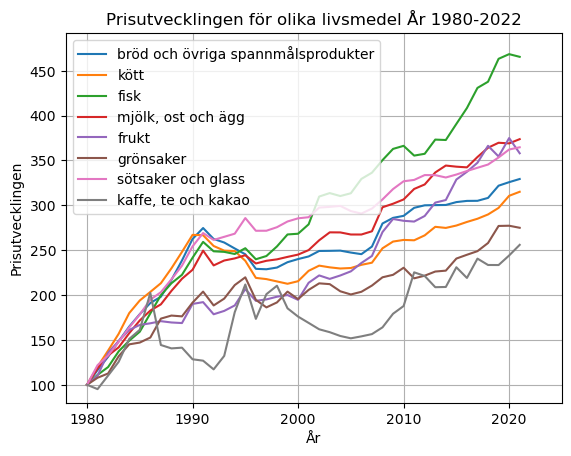

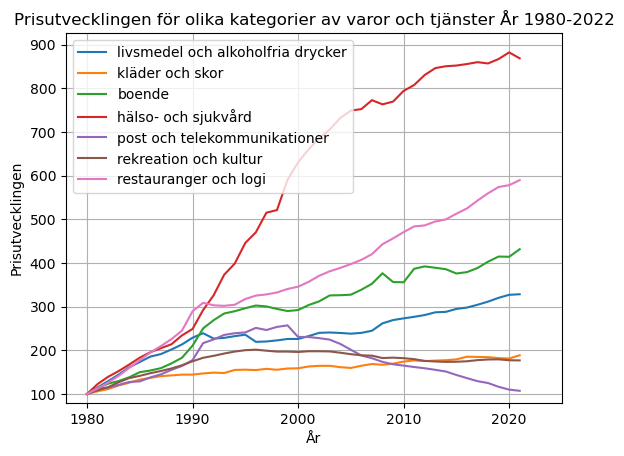

In [5]:
def plotta_data(data_lista):
    """Skapa ett diagram utifrån prisutvecklingen från en lista."""
    max_värde = 0
    data_str = [] # samla alla olika varor tjänster
    åren = [int(year) for year in data_lista[0][1:]] # samla alla år i en lista
    
    # Skapa grafen
    for data in data_lista[1:]:
        data_str.append(data[0])
        y = []
        for d in data[1:]:           # spara alla värderna för kategori
            y.append(float(d))
            if float(d) > max_värde: # spara största värdet för y-axeln, beroende på största värdet som finns i data_lista
                max_värde = float(d)
        plt.plot(åren, y)            # gör graf för kategori
    
    plt.legend(data_str, loc="upper left")
    plt.xlim(1978, 2025)
    max_värde += max_värde / 20 #  lägg till +5% i y-axel värdet för att det ska se snyggt ut
    plt.ylim(80, max_värde)

    # Lägg till info
    plt.xlabel("År")
    plt.ylabel("Prisutvecklingen")
    if len(data_str) == 7:
        plt.title("Prisutvecklingen för olika kategorier av varor och tjänster År 1980-2022")
    else: #elif: len(data_str) == 8:
        plt.title("Prisutvecklingen för olika livsmedel År 1980-2022")
    plt.grid(True)
    plt.show()

plotta_data(livsmedelData)
plotta_data(tjansteData)


## Deluppgift 4
Ev. kommentar:

+-------------------------------------------------------------------------+
|Kategorier olika typer av livsmedel      |Prisutvecklingen i procentform
+=========================================+===============================+
|livsmedel och alkoholfria drycker        |228.36    
+-----------------------------------------+-------------------------------+
|kläder och skor                          |88.68     
+-----------------------------------------+-------------------------------+
|boende                                   |331.43    
+-----------------------------------------+-------------------------------+
|hälso- och sjukvård                      |768.47    
+-----------------------------------------+-------------------------------+
|post och telekommunikationer             |7.29      
+-----------------------------------------+-------------------------------+
|rekreation och kultur                    |76.84     
+-----------------------------------------+---------------------------

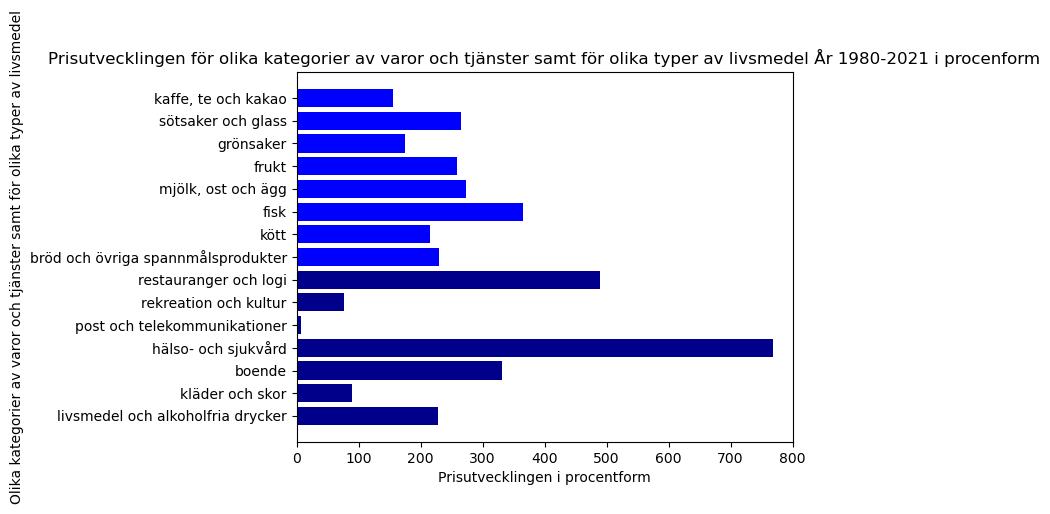

In [6]:
def Prisutveckling_I_Procentform(lista1, lista2):
    """Beräknar prisutvecklingen i procentform för olika kategorier, år 1980–2021.
    Skriver sen ut och ritar resultatet i en tabell och ett stapeldiagram."""
    for index, Data_Lista in enumerate([lista1, lista2]):
        # Skriv ut text fyllning
        print("+-------------------------------------------------------------------------+")
        # lägg till rätt text för rubrik
        titel = "|Kategorier "
        if len(Data_Lista) == 7:
            titel += "av varor och tjänster"
        else: #len(Data_Lista) == 8:
            titel += "olika typer av livsmedel"
        # Skriv ut titeln och rubriken för tabelen
        print("{:42.50}{:<10}".format(titel, "|Prisutvecklingen i procentform"))
        print("+=========================================+===============================+")
        
        # Spara och beräkna prisutveckling i olika kategorier
        x, y = [], []
        for data in Data_Lista[1:]:
            # Beräkna
            pip = data[-1:][0]
            pip = float(pip) - 100 # Ta bort 100%
            pip = round(pip, 2)    # Begränsar floats till två decimaler
            y.append(data[0])      # Spara kategori till stapeldiagram
            x.append(pip)          # Spara beräkning på kategori till stapeldiagram
            
            # Skriv ut kategori och prisutvecklingen i procentform.
            print("|{:41.50}|{:<10}".format(data[0], pip)) # data[0] är namn på varor eller tjänst
            if data != Data_Lista[-1]:
                print("+-----------------------------------------+-------------------------------+")
            else:
                print("+-------------------------------------------------------------------------+")
                
        # Rita stapeldiagram
        plt.barh(y, x, color=["#00008B", "#0000FF"][index])
    # Skapa stapeldiagram
    plt.xlim(0, 800)
    plt.title("Prisutvecklingen för olika kategorier av varor och tjänster samt för olika typer av livsmedel År 1980-2021 i procenform")
    plt.xlabel("Prisutvecklingen i procentform")
    plt.ylabel("Olika kategorier av varor och tjänster samt för olika typer av livsmedel")
    plt.show()

Prisutveckling_I_Procentform(tjansteData, livsmedelData)


## Deluppgift 5
Ev. kommentar:


                      ANALYS AV KPI UNDER ÅREN 2000 - 2022
                      ------------------------------------

                      Största förändring
                      ------------------
År                    %            månad                  Årsmedelvärde
--------------------------------------------------------------------------
2000                  -0.81        Jan                    260.72
2001                  0.87         Apr                    267.08
2002                  0.89         Mar                    272.84
2003                  0.87         Feb                    278.1
2004                  0.76         Mar                    279.15
2005                  0.71         Sep                    280.41
2006                  -0.78        Jan                    284.22
2007                  1.0          Sep                    290.51
2008                  -1.34        Dec                    300.61
2009                  -0.46        Jul                    299.66
20

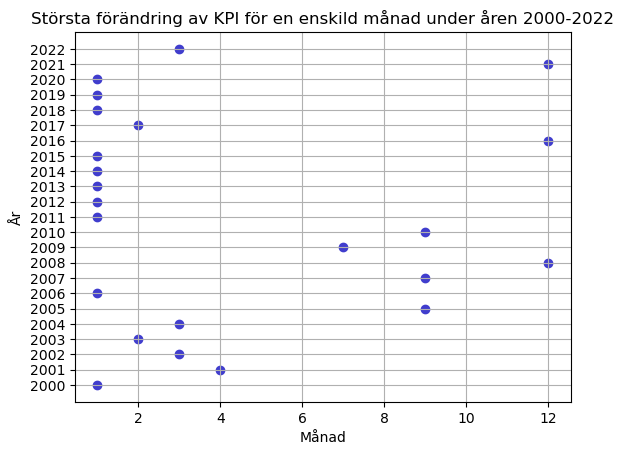

In [7]:
def Månad_Varje_År_Störst_KPI_Förändringen(åren):
    """Beräknar och presenterar den månad från år 2000-2022 som har största KPI-förändringen
    från en månad till nästkommande i utskriven tabel och punktdiagram."""
    alla_månader = ["", "Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]
    största_förändring = [ 0, ""]
    tabel_data = []
    index = 1
    
    # Spara och beräkna data
    while index < len(åren):
        if int(åren[index][0]) > 1999:    # Bara år efter 1999 beräkna
            månader = åren[index]         # All data för all månader.
            summa = float(månader[1])
            
            # Beräkna januari (anvönd föraåret dec)
            största_KPIChange_månad_värde = (float(åren[index][1]) - float(åren[index+1][12])) / float(åren[index+1][12])
            största_KPIChange_månad = 1

            # Beräkna feb till dec
            index2 = 2
            while index2 < len(månader):
                summa += float(månader[index2]) # Sammanlagda värdet för månaden.
                
                # KPI-förändringen från en månad till nästkommande.
                temp = (float(månader[index2]) - float(månader[index2-1])) / float(månader[index2-1])
                if abs(temp) > abs(största_KPIChange_månad_värde): # Spara största värdet.
                    största_KPIChange_månad_värde = temp
                    största_KPIChange_månad = index2
                index2 += 1
                
            # Beräkna
            årsmedelvärde = summa / (len(månader) - 1)
            
            # Spara
            tabel_data.append([månader[0],                    # år
                               största_KPIChange_månad_värde, # procent förändring
                               största_KPIChange_månad,       # månad med störs förändring
                               årsmedelvärde])
            if abs(största_KPIChange_månad_värde) > abs(största_förändring[0]): # Spara om störst
                största_förändring[0] = största_KPIChange_månad_värde
                största_förändring[1] = alla_månader[största_KPIChange_månad] + " " + åren[index][0]
        index += 1

    # Skriva ut tabel data
    print("==========================================================================")
    print()
    print("                      ANALYS AV KPI UNDER ÅREN 2000 - 2022")
    print("                      ------------------------------------")
    print()
    print("                      Största förändring")
    print("                      ------------------")
    print("År                    %            månad                  Årsmedelvärde")
    print("--------------------------------------------------------------------------")

    for data in reversed(tabel_data):
        #         år | %     mån | årsmedelvärde
        print("{:<22}{:<13}{:<23}{}".format(data[0],
                                            round(data[1] * 100, 2), # Omvandla till procent och avrunda
                                            alla_månader[data[2]],
                                            round(data[3], 2) ))     # Omvandla till procent och avrunda
    print()
    print("Största förändring:   {:<13}{}".format(round(största_förändring[0] * 100, 2), # Omvandla till procent och avrunda
                                                  största_förändring[1]))
    print("==========================================================================")
    
    # Skapa punktdiagram
    for row in reversed(tabel_data):
        året = row[0]
        månad = row[2]
        plt.scatter(månad, året, color = "#403DCD")  
    
    # Lägg till text
    plt.xlabel("Månad")
    plt.ylabel("År")
    plt.title("Största förändring av KPI för en enskild månad under åren 2000-2022")
    plt.grid(True)
    plt.show()

Månad_Varje_År_Störst_KPI_Förändringen(kpiData)


## Deluppgift 6
Ev. kommentar:

In [ ]:
def Main():
    """Meny där användaren anger ett av menyalternativen.
    När menyalternativet är utfört ska användaren på nytt kunna ange ett menyalternativ."""
    data_kpiData, data_tjansteData, data_livsmedelData = None, None, None
    Loop = True

    while Loop == True:
        print("Program för att läsa in och analysera resultatet i uppgift 1 – 5")
        print()
        print("1. Läser in csv-filerna")
        print("2. Konsumentprisindex under åren 1980 – 2022")
        print("3. Prisutvecklingen för de olika kategorierna i filerna ”Varor och tjänster” samt ”Livsmedel” under åren 1980 – 2021")
        print("4. Prisutvecklingen i procentform för de olika kategorierna i filerna ”Varor och tjänster” samt ”Livsmedel” under åren 1980 – 2021")
        print("5. Förändringar i KPI under åren 2000 – 2022")
        print("6. Avsluta programmet")
        print()
        val = input("Välj menyalternativ (1–6): ")
        if val == "1":
            # Få information om data filernas namn
            val = input("namn för kpi.csv(standardnamn: kpi-1.csv): ")
            str_kpiData = val if val != "" else "kpi-1.csv"
            val = input("namn för tjänster.csv(standardnamn: tjänster-1.csv): ")
            str_tjansteData = val if val != "" else "tjänster-1.csv"
            val = input("namn för livsmedel.csv(standardnamn: livsmedel-1.csv): ")
            str_livsmedelData = val if val != "" else "livsmedel-1.csv"
            # Hämta data
            data_kpiData = read_file(str_kpiData)
            data_tjansteData = read_file(str_tjansteData)
            data_livsmedelData = read_file(str_livsmedelData)
            # Skriv ut de två första raderna av varje fil
            print("\033[1mkpiData:\033[0m")         # Bold text
            print(kpiData[:2])
            print("\n\033[1mtjansteData:\033[0m")   # Ny rad och sen bold text
            print(tjansteData[:2])
            print("\n\033[1mlivsmedelData:\033[0m") # Ny rad och sen bold text
            print(livsmedelData[:2])
        elif val == "2":
            if kpiData == None:
                continue
            # Fråga efter en månad (1 – 12).
            presentera_månad = int(input("Ange vilken månad som ska presenteras: "))
            # Felkontroll, lite grann
            if presentera_månad > 12:
                presentera_månad = 12
            elif presentera_månad <= 0:
                presentera_månad = 1
            calc_mean(kpiData, presentera_månad) # Beräkna och skapa en graf
        elif val == "3":
            if data_tjansteData == None or data_livsmedelData == None:
                continue
            plotta_data(data_tjansteData)
            plotta_data(data_livsmedelData)
        elif val == "4":
            if data_tjansteData == None or data_livsmedelData == None:
                continue
            Prisutveckling_I_Procentform(data_tjansteData, data_livsmedelData)
        elif val == "5":
            if data_kpiData == None:
                continue
            Månad_Varje_År_Störst_KPI_Förändringen(data_kpiData)
        elif val == "6":
            print("Avslutar programmet")
            Loop = False
        else:
            print("Okänt kommando")
Main()
print("Programmet är avslutat")
